## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID' )

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_filter = combined_df.duplicated(['Mouse ID', 'Timepoint'])
duplicated_mice = combined_df.loc[duplicated_filter,:]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = combined_df.loc[:,'Mouse ID']=='g989'
duplicated_mouse_df = combined_df.loc[duplicated_mouse,:]
duplicated_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = clean_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
tumor_median = grouped_df['Tumor Volume (mm3)'].median()
tumor_variance = grouped_df['Tumor Volume (mm3)'].var()
tumor_stdev = grouped_df['Tumor Volume (mm3)'].std()
tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()

tumor_summary_df = pd.DataFrame({'Mean': tumor_mean,
                    'Medain': tumor_median,
                    'Variance': tumor_stdev,
                    'Standard Deviation': tumor_stdev,
                    'SEM': tumor_sem})

tumor_summary_df


,Mean,Medain,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Measurements')

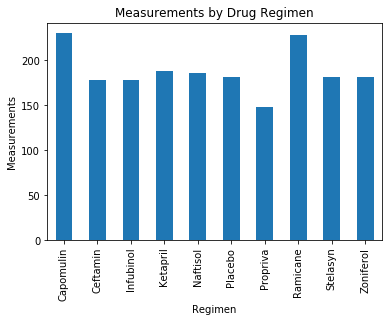

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Find measurement count by grouped regimen
regimen_count = grouped_df['Tumor Volume (mm3)'].count()
#Create plot
regiment_chart=regimen_count.plot(kind='bar')
regiment_chart
#Add title and labels
regiment_chart.set_title("Measurements by Drug Regimen")
regiment_chart.set_xlabel("Regimen")
regiment_chart.set_ylabel("Measurements")


Text(0, 0.5, 'Measurements')

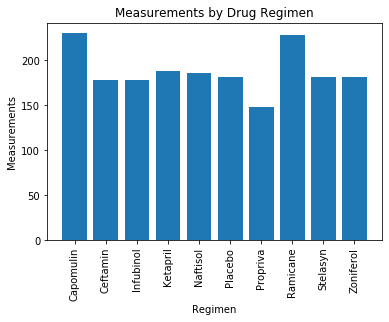

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Create x_axis
x_axis = np.arange(len(grouped_df))
#Create tick locations
tick_locations = [value for value in x_axis]
#Create plot
plt.bar(x_axis, regimen_count)
#Plot ticks
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane',    
       'Stelasyn', 'Zoniferol'] , rotation="vertical")
#Add title and labels
plt.title("Measurements by Drug Regimen")
plt.xlabel("Regimen")
plt.ylabel("Measurements")

Text(0, 0.5, '')

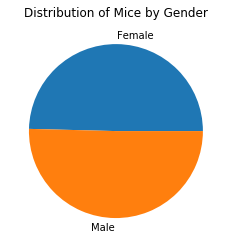

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Find unique mice
unique_mice_df=clean_df.drop_duplicates('Mouse ID')
#Group by gender
grouped_gender_df = unique_mice_df.groupby('Sex')
#Find measurement count by grouped regimen
mice_gender_count = grouped_gender_df['Mouse ID'].count()
#Create plot
gender_chart=mice_gender_count.plot(kind='pie')
gender_chart
#Add title and remove ylabel
gender_chart.set_title("Distribution of Mice by Gender")
gender_chart.set_ylabel('')



Text(0.5, 1.0, 'Distribution of Mice by Gender')

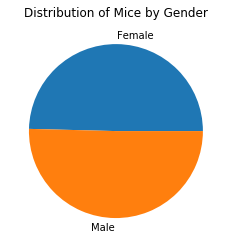

In [97]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#Create Labels
labels = ['Female','Male']
#Create plot
plt.pie(mice_gender_count, labels=labels)
#

#Add title and labels
plt.title("Distribution of Mice by Gender")




## Quartiles, Outliers and Boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Filter for regimens
regimen_filtered_df = clean_df.loc[((clean_df['Drug Regimen'] == 'Capomulin') | (clean_df['Drug Regimen'] == 'Ramicane') | (clean_df['Drug Regimen'] == 'Infubinol')| (clean_df['Drug Regimen'] == 'Ceftamin')),:]

# Start by getting the last (greatest) timepoint for each mouse
# Use groupby to find max of timepoint
grouped_timepoint_df = regimen_filtered_df.groupby('Mouse ID')
max_df = grouped_timepoint_df.max()

#Max time data points
max_timepoint_df = max_df['Timepoint']


#Merge df based on mouse ID and timepoint
combined_max_tumor_df = pd.merge(clean_df,max_timepoint_df,  on=['Mouse ID','Timepoint'])
combined_max_tumor_df

#Rename column to max tumor volume
renamed_max_timepoint_df = combined_max_tumor_df.rename({'Tumor Volume (mm3)' : 'Max Tumor Volume (mm3)'}, axis=1)
renamed_max_timepoint_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Max Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
renamed_max_timepoint_df

## Line and Scatter Plots

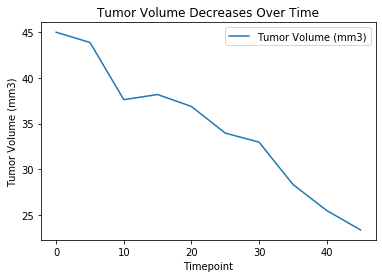

In [159]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Create filter for mouse s185
s185_mouse = clean_df.loc[:,'Mouse ID']== 's185'
#Create dataframe
s185_mouse_df = clean_df.loc[s185_mouse,:]
#filter down to timepoint and tumor volume. Set index as Timepoint
filtered_s185_df = s185_mouse_df[['Timepoint', 'Tumor Volume (mm3)']]
filtered_s185_df = filtered_s185_df.set_index('Timepoint')

#Create plot, add labels and title
s185_plot=filtered_s185_df.plot()
s185_plot.set_ylabel("Tumor Volume (mm3)")
s185_plot.set_title("Tumor Volume Decreases Over Time")
s185_plot

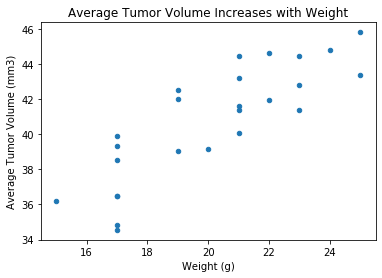

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Create filter
filter_capomulin = clean_df.loc[:,'Drug Regimen']== 'Capomulin'
capomulin_df = clean_df.loc[filter_capomulin,:]
#Groupby mouse ID and get average tumor volume
groupby_capomulin_df = capomulin_df.groupby('Mouse ID')
average_tumor_volume_df = groupby_capomulin_df.mean()
filtered_average_tumor_volume_df = average_tumor_volume_df[['Weight (g)', 'Tumor Volume (mm3)']]
capomulin_plot=filtered_average_tumor_volume_df.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')
capomulin_plot.set_ylabel("Average Tumor Volume (mm3)")
capomulin_plot.set_title("Average Tumor Volume Increases with Weight")
capomulin_plot

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
